In [24]:
%load_ext autoreload
%autoreload 2
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle



# networkx
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import itertools

import copy

from sympy import latex


from sbmi.graph_prior.additive_model.utils import round_expr
from sbmi.data_handling import get_dataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from model_specs import additivemodel

In [10]:
# sample model
m = additivemodel.sample_model(max_len_token=100)
print(m.model_ind)
m.formula

[  0   4 100  -1]


4.70866095098204*sin(1.55896107081243*x_1)

In [11]:
print(latex(round_expr(m.formula, 1)))

4.7 \sin{\left(1.6 x_{1} \right)}


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/var/folders/kx/9z7xgc9916l5ztl7kgxlydkm0000gn/T/ipykernel_52570/1720168661.py:13: SyntaxWarning: invalid escape sequence '\m'
  print(f'f_{i}(x_1) & = ',latex(round_expr(m.formula,1)),f'+ \mathcal N_{noise}', '\\\\')


\begin{align*}
f_0(x_1) & =  - 0.09 x_{1}^{2} - 0.7 x_{1} + \mathcal N_1 \\
f_1(x_1) & =  1.2 x_{1} + 1.7 \sin{\left(2.5 x_{1} \right)} + \mathcal N_1 \\
f_2(x_1) & =  - 0.2 x_{1}^{2} + \mathcal N_2 \\
f_3(x_1) & =  - 0.4 x_{1}^{2} - 0.4 x_{1} + 1.9 \sin{\left(2.5 x_{1} \right)} + \mathcal N_1 \\
f_4(x_1) & =  2.0 x_{1} + \mathcal N_1 \\
\end{align*}


(-30.0, 20.0)

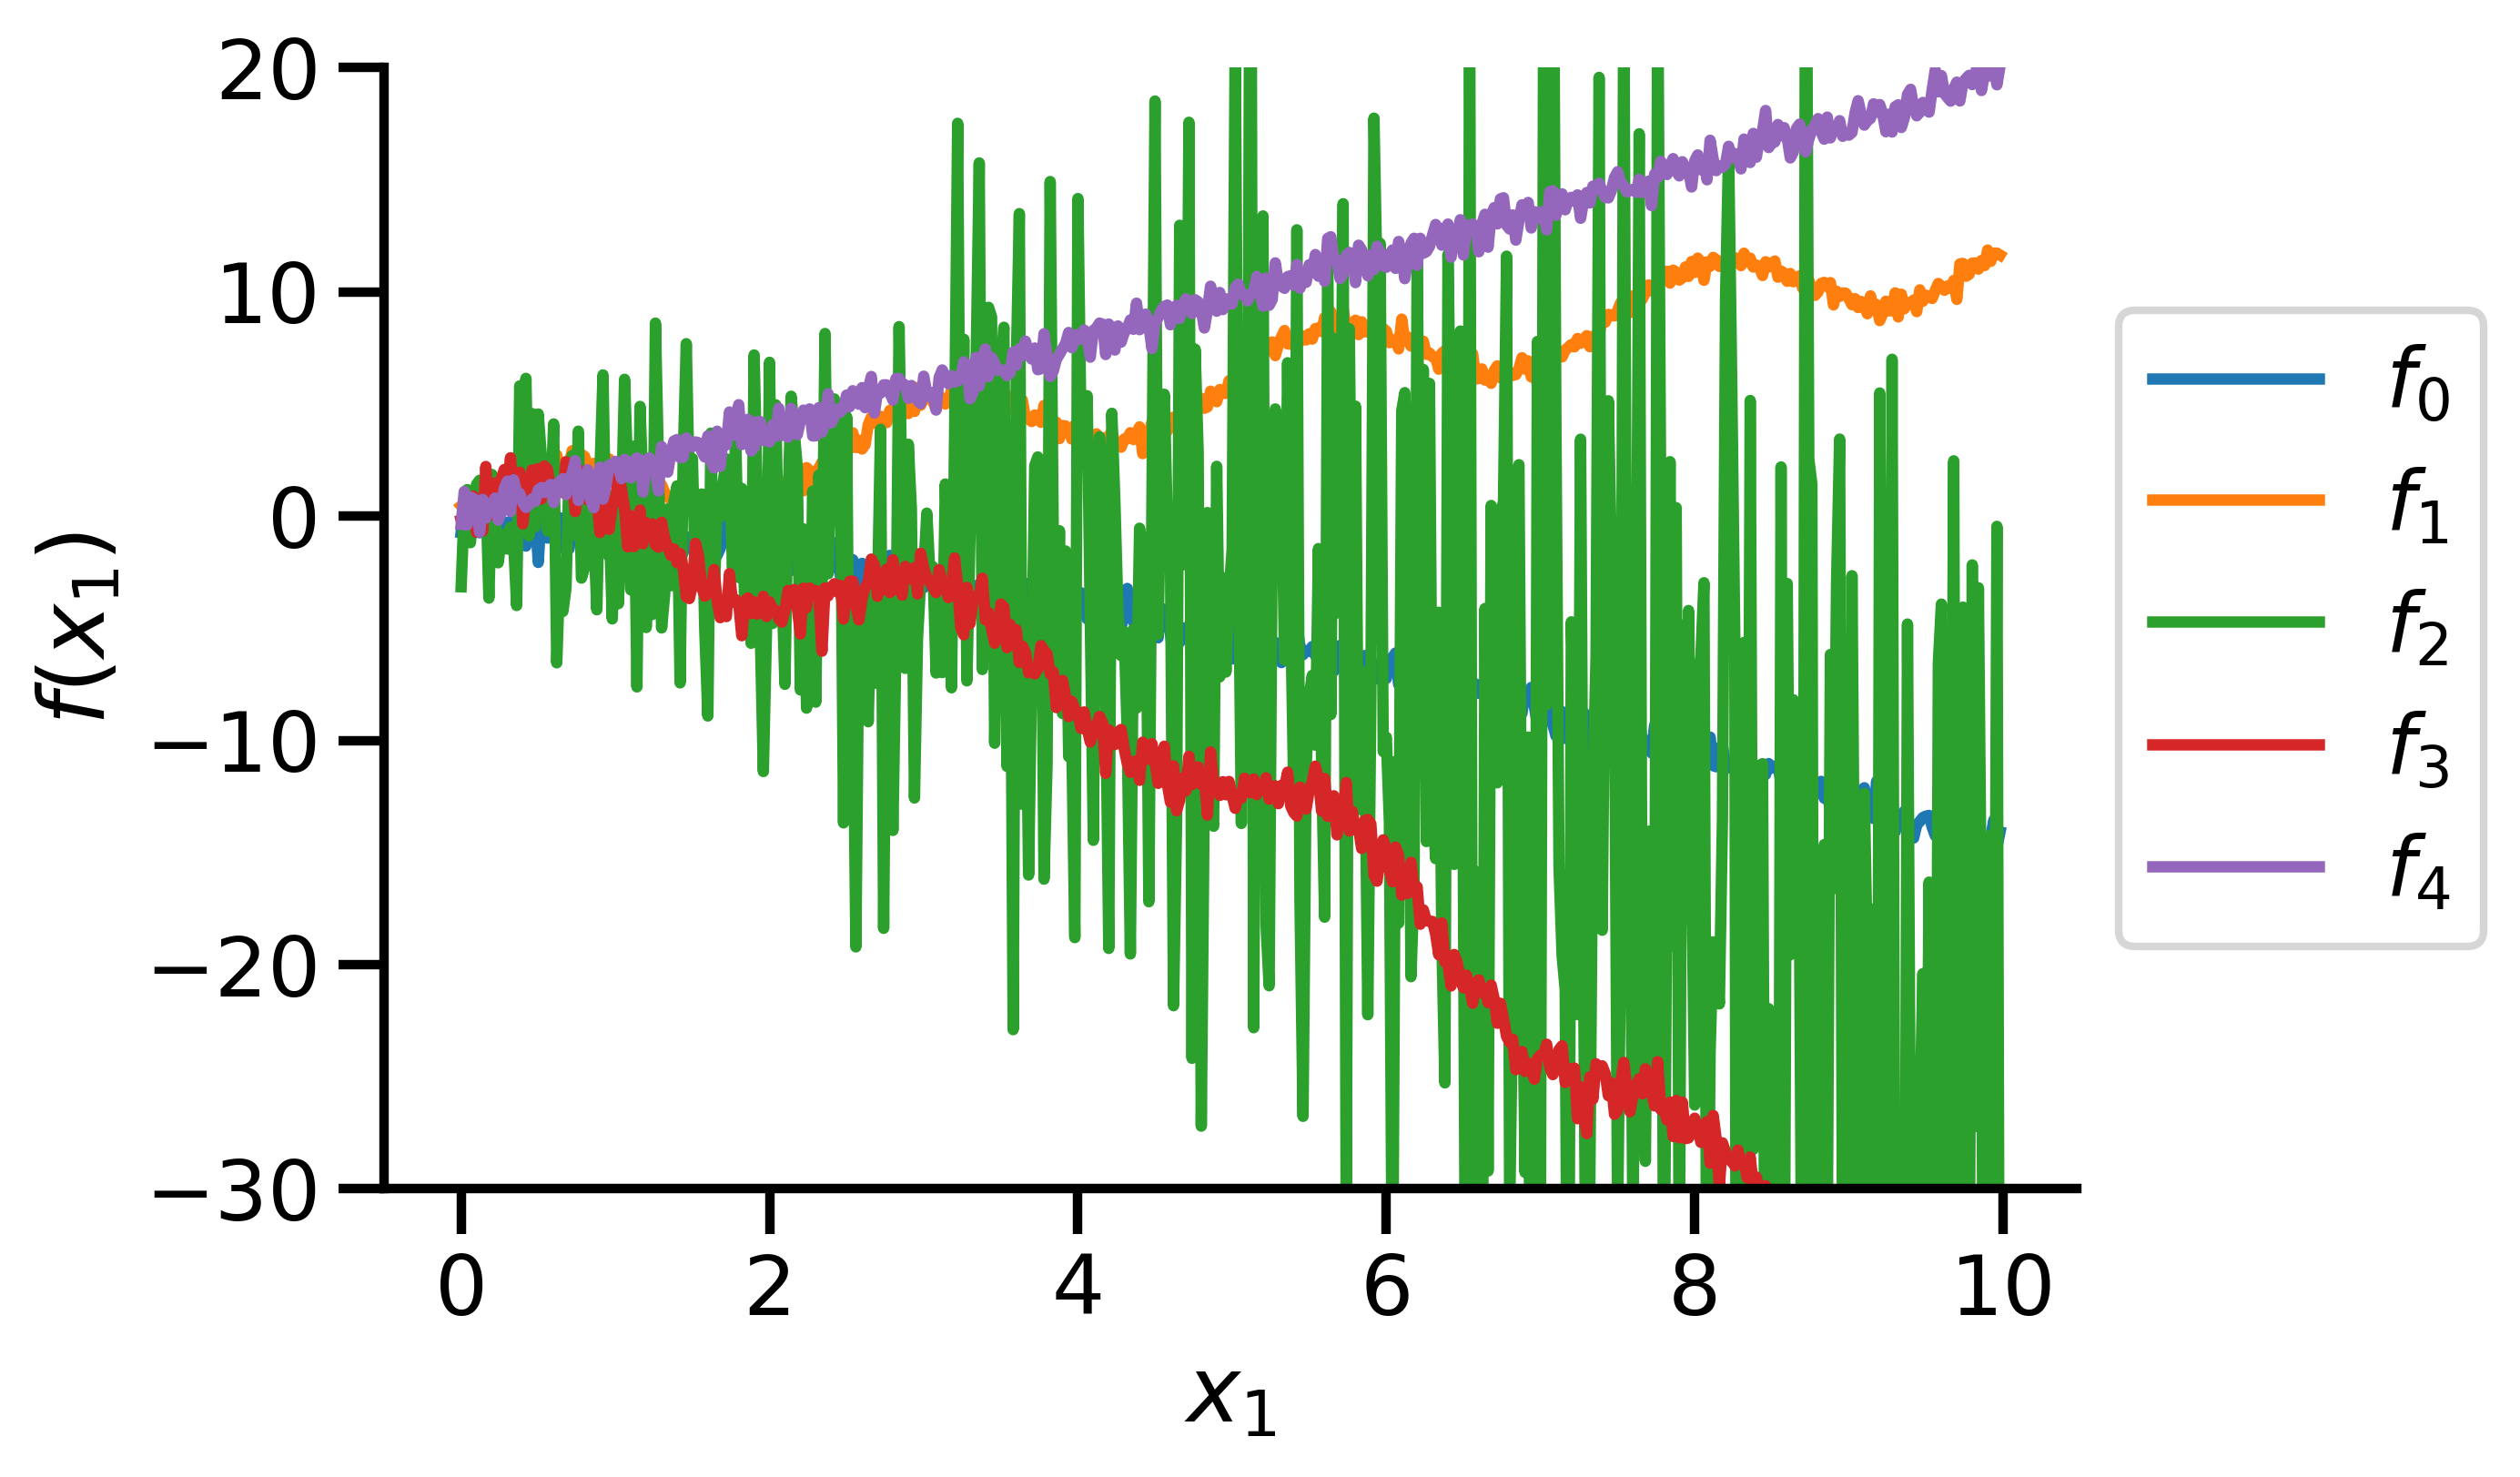

In [12]:
sns.set_context("talk")

np.random.seed(2)

plt.figure(1, figsize=(6, 4), dpi=400)

print("\\begin{align*}")

for i in range(5):
    m = additivemodel.sample_model(max_len_token=100)
    noise = 1 if 100 in m.model_ind else 2

    print(
        f"f_{i}(x_1) & = ",
        latex(round_expr(m.formula, 1)),
        f"+ \mathcal N_{noise}",
        "\\\\",
    )

    t, y = m.run_model()

    plt.plot(t, y[0], label=f"$f_{i}$")

print("\\end{align*}")


plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
sns.despine()
plt.xlabel("$x_1$")
plt.ylabel("$f(x_1)$")
plt.ylim(-30, 20)

In [13]:
# check model components
additivemodel.model_dict

{1: 'c_1*x_1',
 2: 'c_1*x_1',
 3: 'c_1*x_1*x_1',
 4: 'c_1*sin(c_2*x_1)',
 100: 'observer_noise',
 103: 'increasing_noise'}

### Additive Model

[  0   4   2 103  -1]
[{}, {'c_1': 0.07497549163250794, 'c_2': 2.741217637378359}, {'c_1': -0.4774389606468201}, {'c_1': 1.1843313519881977}, {}]

-0.47743896064682*x_1 + 0.0749754916325079*sin(2.74121763737836*x_1)


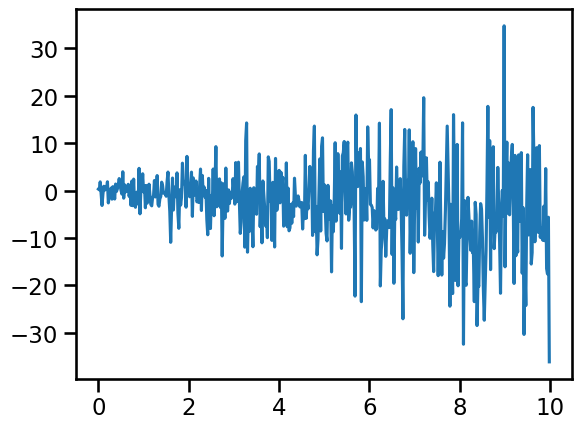

In [17]:
model = additivemodel.sample_model()
print(model.model_ind)
print(model.constants)
print()
print(model.formula)

t, y = model.run_model()

plt.plot(t, y[0])

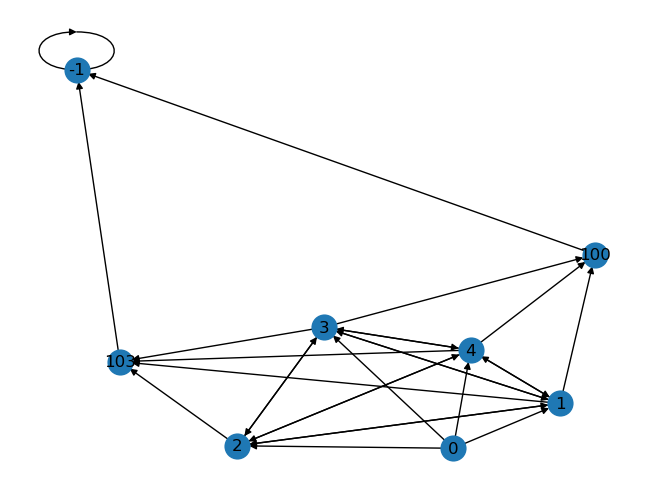

In [18]:
# visualize model graph
# 0 and -1 are start/end nodes

# pos=graphviz_layout(model_graph.G, prog='dot')
nx.draw(additivemodel.model_graph.G, with_labels=True)
plt.show()

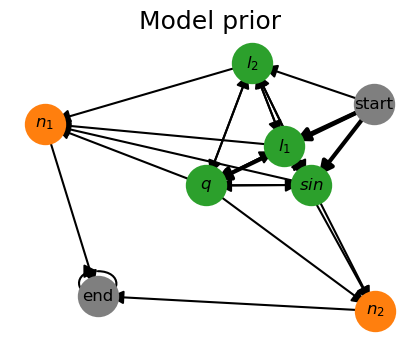

In [20]:
# plt.title("Model Graph")
dpi = 100

sns.set_context("talk")
plt.figure(1, figsize=(4, 3), dpi=dpi)

np.random.seed(9111)  # (9111) #16 17
pos = nx.drawing.layout.spring_layout(additivemodel.model_graph.G)

# pos = graphviz_layout(additivemodel.model_graph.G)


G = additivemodel.model_graph.G

node_size = 800

nx.draw(
    additivemodel.model_graph.G,
    pos=pos,
    nodelist=[0, -1],
    with_labels=True,
    node_color="tab:grey",
    node_size=node_size,
    label="start node",
    labels={0: "start", -1: "end"},
    edgelist=[],
)

nx.draw(
    additivemodel.model_graph.G,
    pos=pos,
    nodelist=[1, 2, 3, 4],
    with_labels=True,
    node_color="tab:green",
    node_size=node_size,
    label="additive components",
    labels={1: "$l_1$", 2: "$l_2$", 3: "$q$", 4: "$sin$"},
    edgelist=[],
)
nx.draw(
    additivemodel.model_graph.G,
    pos=pos,
    nodelist=[100, 103],
    with_labels=True,
    node_color="tab:orange",
    node_size=node_size,
    label="noise",
    labels={100: "$n_2$", 103: "$n_1$"},
    width=2,
    edgelist=[],
)


nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(u, v) for (u, v, d) in G.edges(data=True)],
    width=[d["weight"] * 1.5 for (u, v, d) in G.edges(data=True)],
    arrows=True,
    arrowsize=20,
)

"""
nx.draw_networkx_edges(G, 
                       pos, 
                       edgelist=[(0,2)], 
                       width=[2],
                       arrows=True,
                       arrowsize=20,
                       edge_color='white')
"""
# plt.legend()
plt.title("Model prior")


plt.savefig("prior_additive.png", dpi=dpi)
# plt.show()

In [21]:
# check all edges
[(u, v) for (u, v, d) in G.edges(data=True)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (-1, -1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 100),
 (1, 103),
 (2, 3),
 (2, 4),
 (2, 1),
 (2, 103),
 (3, 4),
 (3, 1),
 (3, 2),
 (3, 100),
 (3, 103),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 100),
 (4, 103),
 (100, -1),
 (103, -1)]

In [27]:
"""
get trainingsdata for additive model
"""

valid_inds = [1, -1]
model_inds, constants, x, y = get_dataset(
    additivemodel, n=100, valid_inds=valid_inds, sort=False, max_len_token=100
)

y = y.squeeze()

In [30]:
y.shape

(100, 500)

[  3 100]
[{'c_1': -0.3785133127169156}, {'c_1': 0.20992990502311223}]


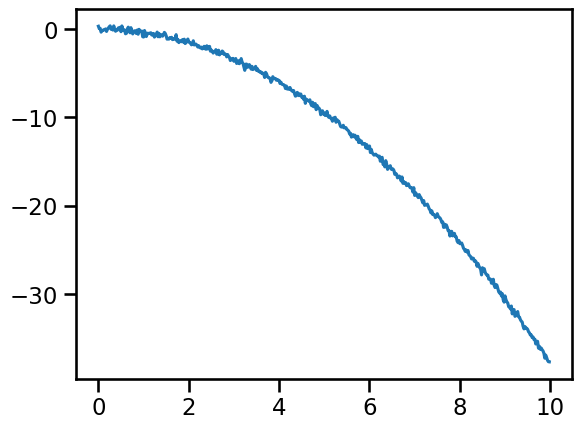

In [32]:
i = 5
print(model_inds[i])
print(constants[i])
plt.plot(x, y[i])